In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# 회귀 모델
공식 이미지 출처: https://hwiyong.tistory.com/93

## 선형성 vs 비선형성
- 변수가 비선형? x, 회귀계수가 바선형인 것을 뜻하는 것.
- 선형회귀 : 표현력에 한계
  - 현실 데이터가 선형 결합으로 표현이 불가능한 데이터라면 정확한 회귀 모델을 만들 수 없습니다.
- 비선형회귀: 현실 세계의 복잡한 관계도 거의 대부분 표현이 가능
  -  불필요한 잡음을 모델에 반영하는 overfitting 문제가 발생할 가능성이 더 커짐

## 종속변수 개수에 따른 구분
- 단변량 선형(or 비선형) 회귀모델
- 다변량 선형(or 비선형) 회귀모델

## 선형 회귀 모델
- 형태가 단순한 만큼 데이터에 대한 많은 가정을 가지고 있음.
1. 오차항은 평균이 0이고 분산이 일정한 정규 분포를 갖는다.
2. 독립변수와 종속변수는 선형 관계이다.
3. 오차항은 자기 상관성이 없다.
4. 데이터에 아웃라이어가 없다.
5. 독립변수와 오차항은 서로 독립이다.
6. 독립변수 간에서는 서로 선형적으로 독립이다.

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print('boston 데이터 세트 크기:,',bostonDF.shape)
bostonDF.head()

boston 데이터 세트 크기:, (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                 random_state=156)

# 선형 회귀 OLS로 학습,예측,평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('rmse:',rmse)
print('Train Variance score:',lr.score(X_train,y_train))
print('Test Variance score:',r2_score(y_test,y_preds)) #print('Variance score:',lr.score(X_test,y_test))

rmse: 4.1589561079556985
Train Variance score: 0.7273505005599823
Test Variance score: 0.7572263323138941


In [0]:
print('절편 값:',lr.intercept_)
print('회귀계수 값:',np.round(lr.coef_,1))

절편 값: 40.995595172164755
회귀계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


## 독립변수와 종속변수가 선형 관계가 X

다항회귀 (Polynomial regression)
- 독립변수에 지수승을 붙여서 여러 개의 변수로 만들어 회귀 모델을 구성하는 기법

In [0]:
from sklearn.preprocessing import PolynomialFeatures
# degree : 변수에 몇 제곱을 가할지 정해주는 것
'''
include_bias : boolean 
If True (default), then include a bias column,
the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).
'''

In [0]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=156)

## Pipeline을 이용한 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합.
p_model = Pipeline([('poly',PolynomialFeatures(degree=2,include_bias=False)),
                    ('linear',LinearRegression())])

p_model.fit(X_train,y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f},RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

# 3차 다항식으로 증가시키면 어떻게 될까?
p_model = Pipeline([('poly',PolynomialFeatures(degree=3,include_bias=False)),
                    ('linear',LinearRegression())])

p_model.fit(X_train,y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f},RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

ERROR! Session/line number was not unique in database. History logging moved to new session 59
MSE: 15.556,RMSE : 3.944
Variance score: 0.782
MSE: 79625.595,RMSE : 282.180
Variance score: -1116.598


다항회귀는 오버피팅(과적합)을 주의해야 함.

---

## 리지 회귀
- 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델
- **가중치의 절댓값을 가능한 한 작게 만드는 것이 목표**
- L2 규제 : W의 제곱에 대해 페널티를 부여하는 방식
![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99BE24355C90F8522D)

- alpha 값을 변경한다는 것은 penelty term을 제어 하는 것을 의미함. alpha값이 클수록 penalty 또한 커지게 되면서 계수의 크기가 줄어든다.
  - alpha 값이 커지면 ->회귀 계수 w 감소 (Overfitting 개선)
  - alpha 값이 작아지면 -> RSS(w) 최소화 (학습 데이터 적합을 더 개선)

In [0]:
from sklearn.linear_model import Ridge

ridge = Ridge(5).fit(X_train,y_train)
y_preds = ridge.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('rmse:',rmse)
print('Train Variance score:',ridge.score(X_train,y_train))
print('Test Variance score:',ridge.score(X_test,y_test))

rmse: 4.184014787150442
Train Variance score: 0.7178072991900555
Test Variance score: 0.7542919830143353


alpha 값이 클수록 훈련세트에서 성능이 나빠지지만 더 일반화된 모델이 된다.
- 아주 작은 alpha 값은 계수를 거의 제한하지 않게 되므로 일반 선형회귀모델과 비슷해짐.

In [0]:
ridge = Ridge(0.1).fit(X_train,y_train)
y_preds = ridge.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('rmse:',rmse)
print('Train Variance score:',ridge.score(X_train,y_train))
print('Test Variance score:',ridge.score(X_test,y_test))

rmse: 4.152624793103486
Train Variance score: 0.7272569626530365
Test Variance score: 0.7579649342693625


In [0]:
alphas =[0,0.1,1,10,100,1000]

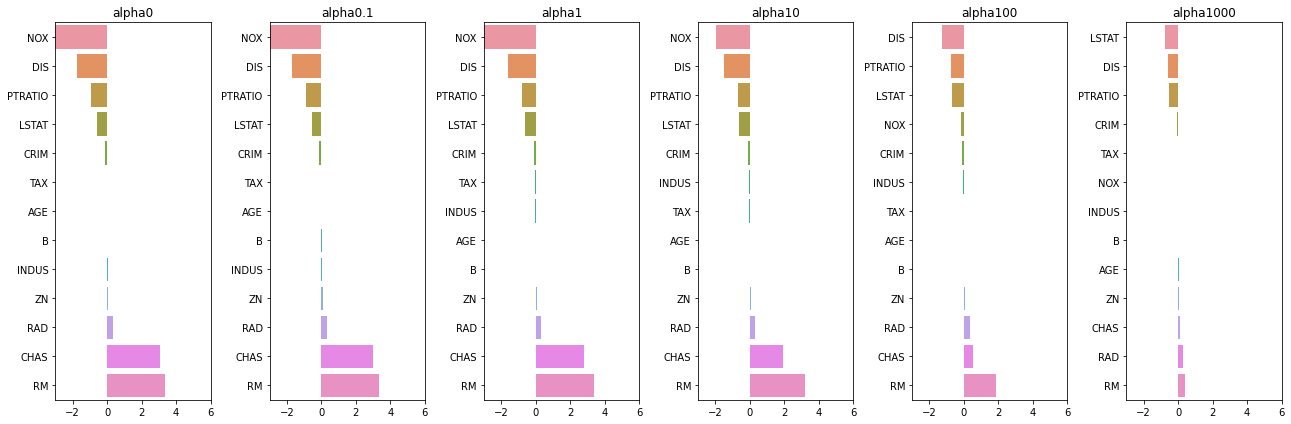

In [0]:
fig, axs = plt.subplots(figsize=(18,6),nrows=1, ncols=6)

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train,y_train)

  coeff = pd.Series(data=ridge.coef_,index=X_train.columns)
  colname = 'alpha'+str(alpha)
  
  coeff = coeff.sort_values(ascending = True)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index,ax=axs[pos])

plt.tight_layout()
plt.show()

CHAS 와 NOX 피처가 alpha 값을 증가시킴에 따라 회귀 계수가 크게 작아지는 것을 볼 수 있다.

**리지 회귀의 경우에는 회귀계수를 0으로 만들지는 않는다.**

**애초에 중요한 것은 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이다.**

## 라쏘 회귀
- L1 규제 적용: W의 절댓값에 페널티를 부여하는 방식
- 회귀계수를 정말 0으로 만들어 버림 (완전히 제외되는 피처가 생김, feature selection이 자동으로 이루어짐)
  - 이 모델의 가장 중요한 feature가 무엇인지 드러내준다.
![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99B45E355C90F8532C)

In [0]:
from sklearn.linear_model import Lasso
lasso_alphas=[0.07,0.1,0.5,1,3]

coeff_df = pd.DataFrame()
for idx, alpha in enumerate(lasso_alphas):
  lasso = Lasso(alpha).fit(X_train,y_train)
  

  coeff = pd.Series(data=lasso.coef_,index=X_train.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  y_preds = lasso.predict(X_test)
  mse = mean_squared_error(y_test,y_preds)
  rmse = np.sqrt(mse)
  print('alpha:',alpha)
  print('rmse:',rmse)
  print('Train Variance score:',lasso.score(X_train,y_train))
  print('Test Variance score:',lasso.score(X_test,y_test))

alpha: 0.07
rmse: 4.212121840351626
Train Variance score: 0.7124281063363123
Test Variance score: 0.7509796978590242
alpha: 0.1
rmse: 4.222415858691646
Train Variance score: 0.7112922642769672
Test Variance score: 0.7497610474831455
alpha: 0.5
rmse: 4.3877210285985
Train Variance score: 0.6989196816993419
Test Variance score: 0.7297840875842413
alpha: 1
rmse: 4.705007838439639
Train Variance score: 0.670582669540182
Test Variance score: 0.6892911611262599
alpha: 3
rmse: 5.439130697301936
Train Variance score: 0.5832639578517178
Test Variance score: 0.5847669678717631


In [0]:
# 첫 번째 컬럼순으로 내림차순 정렬
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.327887,3.257028,2.158154,0.723950,0.000000
CHAS,1.671245,1.151522,0.000000,0.000000,0.000000
RAD,0.312682,0.314905,0.301565,0.269078,0.042953
ZN,0.071332,0.071786,0.074166,0.076116,0.060456
B,0.011654,0.011685,0.011388,0.010770,0.009307
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.007091,-0.005831,0.005912,0.021546,0.050342
TAX,-0.016279,-0.016509,-0.016660,-0.015541,-0.006449
INDUS,-0.034672,-0.028165,-0.000000,-0.000000,0.000000
CRIM,-0.093055,-0.092538,-0.075909,-0.053836,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 0으로 바뀌고 있다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

## 엘라스틱넷 회귀
- L2규제와 L1규제를 합친 것
![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFDF355C90F8532C)
- 라쏘 회귀가 중요 피처만 선택 후, 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 있음. 이러한 성향 때문에 회귀 계수의 값이 급격하게 변동을 할 수 있는데, 이를 완화하기 위해 리지 회귀의 L2 규제를 추가한 것이다.
- 두 개의 규제가 결합되어 있기 때문에 상대적으로 오래 걸린다.

In [0]:
from sklearn.linear_model import ElasticNet

elastic_alphas=[0.07,0.1,0.5,1,3]

coeff_df = pd.DataFrame()
for idx, alpha in enumerate(elastic_alphas):
  elastic = ElasticNet(alpha,l1_ratio=0.07).fit(X_train,y_train)  # l1_ratio: a /a+b
  

  coeff = pd.Series(data=elastic.coef_,index=X_train.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  y_preds = elastic.predict(X_test)
  mse = mean_squared_error(y_test,y_preds)
  rmse = np.sqrt(mse)
  print('alpha:',alpha)
  print('rmse:',rmse)
  print('Train Variance score:',elastic.score(X_train,y_train))
  print('Test Variance score:',elastic.score(X_test,y_test))

alpha: 0.07
rmse: 4.250949162596892
Train Variance score: 0.7117852428022275
Test Variance score: 0.7463676019483518
alpha: 0.1
rmse: 4.278176600313743
Train Variance score: 0.7098438487843206
Test Variance score: 0.7431081528976299
alpha: 0.5
rmse: 4.485014280875817
Train Variance score: 0.6917466245565024
Test Variance score: 0.7176677001375401
alpha: 1
rmse: 4.6109309287703
Train Variance score: 0.6779915189580445
Test Variance score: 0.701592222166385
alpha: 3
rmse: 4.876583791878869
Train Variance score: 0.6472385634824479
Test Variance score: 0.6662169435460025


In [0]:
# 첫 번째 컬럼순으로 내림차순 정렬
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.885519,2.684119,1.397577,0.885205,0.364494
CHAS,1.338815,1.088612,0.298238,0.138528,0.012293
RAD,0.331439,0.335853,0.351767,0.343111,0.282486
ZN,0.073506,0.074459,0.077601,0.077084,0.075053
B,0.011427,0.011376,0.010852,0.010563,0.010162
AGE,-0.003434,-0.001648,0.013516,0.023049,0.037628
TAX,-0.016711,-0.016948,-0.017792,-0.017691,-0.015786
INDUS,-0.037163,-0.036781,-0.023364,-0.007918,0.000000
CRIM,-0.099812,-0.100435,-0.099230,-0.093321,-0.076990
LSTAT,-0.642653,-0.656997,-0.741657,-0.770970,-0.773485


상대적으로 라쏘보다 0으로 가는 것이 적음.

# 데이터 정규화
- 선형 회귀 모델에서는 데이터 분포도의 정규화와 인코딩이 먼저 선행이 되어야 한다는 점을 잊지말자.

기본적인 순서
1. StandaredScaler 또는 MinMaxScaler를 이용해 정규화 진행 ( RobustScaler로 있음)
2. 정규화가 된 피처들에 다항 특성(Polynomial)을 적용
3. log 변환을 통해 정규 분포로 변환
 
- 기본적으로 target이 왜곡된 형태이면 부정적인 영향을 미칠 가능성이 큼.
- 피처값은 target보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 끼칠 수 있음.